In [2]:
import torch
import torchvision
from torchvision import transforms, datasets
import os
from utils import imshow

In [55]:
base_dir = "rawdata/"
transform = transforms.Compose(
    [transforms.Resize((256, 256)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset = datasets.ImageFolder(root=base_dir, transform=transform)

In [56]:
dataset

Dataset ImageFolder
    Number of datapoints: 382
    Root location: rawdata/

In [57]:
train_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=4,
                                          shuffle=True,
                                          num_workers=4)


In [86]:
dataiter = iter(train_loader)
print(data)
img, labe = dataiter.next()
img.shape

[tensor([[[[ 0.7569,  0.7569,  0.7569,  ...,  0.6314,  0.6314,  0.6314],
          [ 0.7569,  0.7569,  0.7569,  ...,  0.6314,  0.6314,  0.6314],
          [ 0.7569,  0.7569,  0.7569,  ...,  0.6314,  0.6314,  0.6314],
          ...,
          [ 0.6941,  0.6941,  0.6941,  ...,  0.5765,  0.5765,  0.5765],
          [ 0.6941,  0.6941,  0.6941,  ...,  0.5765,  0.5765,  0.5765],
          [ 0.6941,  0.6941,  0.6941,  ...,  0.5765,  0.5765,  0.5765]],

         [[ 0.7882,  0.7882,  0.7882,  ...,  0.6314,  0.6314,  0.6314],
          [ 0.7882,  0.7882,  0.7882,  ...,  0.6314,  0.6314,  0.6314],
          [ 0.7882,  0.7882,  0.7882,  ...,  0.6314,  0.6314,  0.6314],
          ...,
          [ 0.7020,  0.7020,  0.7020,  ...,  0.5529,  0.5529,  0.5529],
          [ 0.7020,  0.7020,  0.7020,  ...,  0.5529,  0.5529,  0.5529],
          [ 0.7020,  0.7020,  0.7020,  ...,  0.5529,  0.5529,  0.5529]],

         [[ 0.8824,  0.8824,  0.8824,  ...,  0.6471,  0.6471,  0.6471],
          [ 0.8824,  0.8824, 

torch.Size([4, 3, 256, 256])

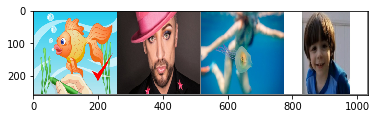

In [87]:
import matplotlib.pyplot as plt
import numpy as np
img.shape
imshow(torchvision.utils.make_grid(img))

In [64]:
from PIL import Image
import torchvision.transforms.functional as F
import torch.nn as nn
img = Image.open("0016.jpg")
img = img.convert("RGB")
img = img.resize((256, 256))
# npimg = np.asarray(img) / 255
# npimg = np.transpose(npimg, (1, 2, 0))
transform = transforms.Compose(
    [transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
npimg = transform(img)
npimg = npimg.unsqueeze(0)
npimg.shape

torch.Size([1, 3, 256, 256])

In [56]:
net = torchvision.models.vgg16()
net.classifier[6] = nn.Linear(4096, 5)
weightsdir = "/home/n0pj/Dev/sgpod/torchsgpodv1/sgpod/weights/vloss0.4852-vacc0.8701-loss0.4034-acc0.8328.pth"
net.load_state_dict(torch.load(weightsdir))
classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck", )


In [65]:
net.eval()
with torch.no_grad():
    outputs = net(npimg)

In [77]:
_, predict = torch.max(outputs.data, 1)

In [78]:
classes[predict]

'deer'

In [79]:
outputs

tensor([[-2.6981,  1.0413, -0.7241, -3.0086,  2.0007]])

In [81]:
dlist = os.listdir("rawdata/")
criterion = nn.CrossEntropyLoss()
criterion(outputs, dlist)

AttributeError: 'list' object has no attribute 'size'

In [83]:
net.losses["x"]

AttributeError: 'VGG' object has no attribute 'losses'

In [85]:
x = 9400
x - 0.9*x

940.0